# Small dataset text classification using deep learning

## 1. Recurrent (LSTM/GRU)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
import os
import datetime
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('results.txt',sep="<")
df

print|index|and|values void,PredefinedType^MethodDeclaration_ParameterList_Parameter_IdentifierName,array void,PredefinedType^MethodDeclaration_ParameterList_Parameter,my|array void,PredefinedType^MethodDeclaration_Block_ForStatement_VariableDeclaration_VariableDeclarator_EqualsValueClause_InvocationExpression_SimpleMemberAccessExpression0_IdentifierName0,my|array void,PredefinedType^MethodDeclaration_Block_ForStatement_LessThanOrEqualExpression_InvocationExpression_SimpleMemberAccessExpression0_IdentifierName0,my|array void,PredefinedType^MethodDeclaration_Block_ForStatement_ExpressionStatement_InvocationExpression_ArgumentList1_Argument2_InvocationExpression_SimpleMemberAccessExpression0_IdentifierName0,my|array void,PredefinedType^MethodDeclaration_Block_ForStatement_VariableDeclaration_PredefinedType,int void,PredefinedType^MethodDeclaration_Block_ForStatement_VariableDeclaration_VariableDeclarator_EqualsValueClause_InvocationExpression_SimpleMemberAccessExpression0_IdentifierName1,get|lower|bound void,PredefinedType^MethodDeclaration_Block_ForStatement_VariableDeclaration_VariableDeclarator_EqualsValueClause_InvocationExpression_ArgumentList1_Argument0_NumericLiteralExpression,0 void,PredefinedType^MethodDeclaration_Block_ForStatement_LessThanOrEqualExpression_InvocationExpression_ArgumentList1_Argument0_NumericLiteralExpression,0 void,PredefinedType^MethodDeclaration_Block_ForStatement_VariableDeclaration_VariableDeclarator,i void,PredefinedType^MethodDeclaration_Block_ForStatement_LessThanOrEqualExpression_IdentifierName,i void,PredefinedType^MethodDeclaration_Block_ForStatement_PostIncrementExpression_IdentifierName,i void,PredefinedType^MethodDeclaration_Block_ForStatement_ExpressionStatement_InvocationExpression_ArgumentList1_Argument1_IdentifierName,i void,PredefinedType^MethodDeclaration_Block_ForStatement_ExpressionStatement_InvocationExpression_ArgumentList1_Argument2_InvocationExpression_ArgumentList1_Argument0_IdentifierName,i void,PredefinedType^MethodDeclaration_Block_ForStatement_LessThanOrEqualExpression_InvocationExpression_SimpleMemberAccessExpression0_IdentifierName1,get|upper|bound void,PredefinedType^MethodDeclaration_Block_ForStatement_ExpressionStatement_InvocationExpression_SimpleMemberAccessExpression0_IdentifierName0,console void,PredefinedType^MethodDeclaration_Block_ForStatement_ExpressionStatement_InvocationExpression_SimpleMemberAccessExpression0_IdentifierName1,write|line void,PredefinedType^MethodDeclaration_Block_ForStatement_ExpressionStatement_InvocationExpression_ArgumentList1_Argument0_StringLiteralExpression,SPACE void,PredefinedType^MethodDeclaration_Block_ForStatement_ExpressionStatement_InvocationExpression_ArgumentList1_Argument2_InvocationExpression_SimpleMemberAccessExpression0_IdentifierName1,get|value void,PredefinedType^MethodDeclaration,METHOD_NAME array,IdentifierName^Parameter,my|array array,IdentifierName^Parameter^ParameterList^MethodDeclaration_Block_ForStatement_VariableDeclaration_VariableDeclarator_EqualsValueClause_InvocationExpression_SimpleMemberAccessExpression0_IdentifierName0,my|array array,IdentifierName^Parameter^ParameterList^MethodDeclaration_Block_ForStatement_LessThanOrEqualExpression_InvocationExpression_SimpleMemberAccessExpression0_IdentifierName0,my|array array,IdentifierName^Parameter^ParameterList^MethodDeclaration_Block_ForStatement_ExpressionStatement_InvocationExpression_ArgumentList1_Argument2_InvocationExpression_SimpleMemberAccessExpression0_IdentifierName0,my|array array,IdentifierName^Parameter^ParameterList^MethodDeclaration_Block_ForStatement_VariableDeclaration_PredefinedType,int array,IdentifierName^Parameter^ParameterList^MethodDeclaration_Block_ForStatement_VariableDeclaration_VariableDeclarator_EqualsValueClause_InvocationExpression_SimpleMemberAccessExpression0_IdentifierName1,get|lower|bound array,IdentifierName^Parameter^ParameterList^MethodDeclaration_Block_ForStatement_VariableDeclaration_VariableDeclarator_EqualsValueClause_Invoc

In [22]:
training_data = df[df.columns[0]].to_numpy()
training_data = np.reshape(training_data,(-1,1))
training_data[:3]

array([['swap void,PredefinedType^MethodDeclaration_TypeParameterList_TypeParameter,t void,PredefinedType^MethodDeclaration_ParameterList_Parameter_IdentifierName,t void,PredefinedType^MethodDeclaration_ParameterList_Parameter_IdentifierName,t void,PredefinedType^MethodDeclaration_Block_LocalDeclarationStatement_VariableDeclaration_IdentifierName,t void,PredefinedType^MethodDeclaration_ParameterList_Parameter,a void,PredefinedType^MethodDeclaration_Block_LocalDeclarationStatement_VariableDeclaration_VariableDeclarator_EqualsValueClause_IdentifierName,a void,PredefinedType^MethodDeclaration_Block_ExpressionStatement_SimpleAssignmentExpression_IdentifierName0,a void,PredefinedType^MethodDeclaration_ParameterList_Parameter,b void,PredefinedType^MethodDeclaration_Block_ExpressionStatement_SimpleAssignmentExpression_IdentifierName1,b void,PredefinedType^MethodDeclaration_Block_ExpressionStatement_SimpleAssignmentExpression_IdentifierName0,b void,PredefinedType^MethodDeclaration_Block_LocalD

In [23]:
vectorizer = layers.TextVectorization(output_mode="int")
vectorizer.adapt(training_data)
integer_data = vectorizer(training_data)
print(integer_data)

tf.Tensor(
[[ 54  16   2   2  21  18  20  25  17  23  24  19  22  15  27  49  47  40
   30   9   9  37  35  14  14  45  26  46  48  39  33  12  12  43  34  13
   13  44  29   8   8  36  32  11  11  42  28   7   7  41  71  79  88  76
   83  87  77  84  94  73  86  91  75  82  93  72  81  90  57  63  69  58
   64  66  56  62  68  50  52   6   6  38   3   5   4   3   5   4  31  10
   10  80  89  74  92  78  85  61  67  59  70  60  65  53  51   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [119  99  98 102 107 113 104 101 103 108 100 109 

In [29]:
#****************************************
#need to modify this part
labels = df[df.columns[1]]
y = np.argmax(pd.get_dummies(labels).to_numpy(), axis=1)
X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.20, random_state=42, stratify=y)

ValueError: attempt to get argmax of an empty sequence

In [6]:
max_features = 20000
embedding_dim = 30

inputs = tf.keras.Input(shape=(1,), dtype=tf.string, name='text')
x = vectorizer(inputs)
x = layers.Embedding(max_features + 1, embedding_dim)(x)

#x = layers.LSTM(10, dropout=0.2, recurrent_dropout=0.2)(x)
x = tf.keras.layers.GRU(10)(x)

x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.3)(x)
num_classes = 10
outputs = layers.Dense(num_classes, activation="softmax", name="predictions")(x)

model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text (InputLayer)           [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 30)          600030    
                                                                 
 gru (GRU)                   (None, 10)                1260      
                                                                 
 dense (Dense)               (None, 20)                220       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                             

In [7]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
callbacks = [
    keras.callbacks.TensorBoard(logdir)
]
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=callbacks)

Epoch 1/10
3/3 [==============================] - 6s 282ms/step - loss: 2.3098 - acc: 0.0843 - val_loss: 2.2932 - val_acc: 0.0952
Epoch 2/10
3/3 [==============================] - 0s 42ms/step - loss: 2.2943 - acc: 0.1325 - val_loss: 2.2812 - val_acc: 0.1429
Epoch 3/10
3/3 [==============================] - 0s 37ms/step - loss: 2.2857 - acc: 0.1325 - val_loss: 2.2688 - val_acc: 0.6190
Epoch 4/10
3/3 [==============================] - 0s 37ms/step - loss: 2.2772 - acc: 0.3012 - val_loss: 2.2552 - val_acc: 0.6190
Epoch 5/10
3/3 [==============================] - 0s 37ms/step - loss: 2.2629 - acc: 0.4096 - val_loss: 2.2392 - val_acc: 0.6190
Epoch 6/10
3/3 [==============================] - 0s 40ms/step - loss: 2.2540 - acc: 0.4578 - val_loss: 2.2222 - val_acc: 0.6190
Epoch 7/10
3/3 [==============================] - 0s 37ms/step - loss: 2.2394 - acc: 0.4458 - val_loss: 2.2042 - val_acc: 0.6190
Epoch 8/10
3/3 [==============================] - 0s 37ms/step - loss: 2.2333 - acc: 0.4699 - va

In [8]:
%load_ext tensorboard
%tensorboard --logdir logs

In [9]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 31ms/step - loss: 2.1681 - acc: 0.5185


[2.168147087097168, 0.5185185074806213]

In [10]:
predictions = model.predict(X_test)
print(predictions.shape)

1/1 [==============================] - 0s 411ms/step
(27, 10)


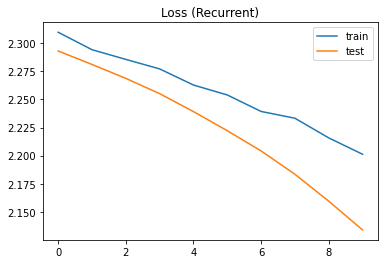

In [11]:
plt.title('Loss (Recurrent)')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 2. Transformers

In [118]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [119]:
vocab_size = 20000  # Only consider the top 20k words
maxlen = 30  # Only consider the first 200 words of each sentence

embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(10, activation="softmax")(x)

model_tr = keras.Model(inputs=inputs, outputs=outputs)

model_tr.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_tr.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 30)]              0         
                                                                 
 token_and_position_embeddin  (None, 30, 32)           640960    
 g_5 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_5 (Transf  (None, 30, 32)           10656     
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_5   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_22 (Dropout)        (None, 32)                0   

In [120]:
vectorizer_tr = layers.TextVectorization(output_mode="int", output_sequence_length=maxlen)
vectorizer_tr.adapt(training_data)
X_train_tr = vectorizer_tr(X_train)
X_test_tr = vectorizer_tr(X_test)
X_train_tr

<tf.Tensor: shape=(104, 30), dtype=int64, numpy=
array([[ 39,   4,  17, ...,   0,   0,   0],
       [ 26,  31,  22, ...,   0,   0,   0],
       [  2, 103,  10, ...,   0,   0,   0],
       ...,
       [  2,   9,  17, ...,   0,   0,   0],
       [  2,  44,  26, ...,   0,   0,   0],
       [  5,   3,  30, ...,   0,   0,   0]], dtype=int64)>

In [129]:
history_tr = model_tr.fit(X_train_tr, y_train_tr, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 0s 46ms/step - loss: 1.5633 - accuracy: 0.4940 - val_loss: 1.0733 - val_accuracy: 0.6190
Epoch 2/10
3/3 [==============================] - 0s 38ms/step - loss: 1.5547 - accuracy: 0.5783 - val_loss: 1.0292 - val_accuracy: 0.6667
Epoch 3/10
3/3 [==============================] - 0s 35ms/step - loss: 1.4565 - accuracy: 0.5904 - val_loss: 1.0116 - val_accuracy: 0.7143
Epoch 4/10
3/3 [==============================] - 0s 35ms/step - loss: 1.4480 - accuracy: 0.5783 - val_loss: 0.9819 - val_accuracy: 0.6667
Epoch 5/10
3/3 [==============================] - 0s 35ms/step - loss: 1.3785 - accuracy: 0.5904 - val_loss: 0.9385 - val_accuracy: 0.7143
Epoch 6/10
3/3 [==============================] - 0s 34ms/step - loss: 1.3129 - accuracy: 0.6145 - val_loss: 0.8963 - val_accuracy: 0.7619
Epoch 7/10
3/3 [==============================] - 0s 31ms/step - loss: 1.2600 - accuracy: 0.6386 - val_loss: 0.8503 - val_accuracy: 0.7619
Epoch 8/10
3/3 [===========

In [130]:
model_tr.evaluate(X_test_tr, y_test_tr)

1/1 [==============================] - 0s 25ms/step - loss: 1.3369 - accuracy: 0.6296


[1.3368749618530273, 0.6296296119689941]

In [131]:
predictions_tr = model_tr.predict(X_test_tr)
print(predictions_tr.shape)

(27, 10)


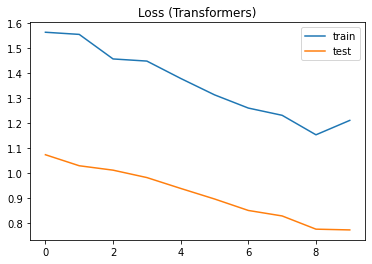

In [133]:
plt.title('Loss (Transformers)')
plt.plot(history_tr.history['loss'], label='train')
plt.plot(history_tr.history['val_loss'], label='test')
plt.legend()
plt.show()